In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [3]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df=df.drop(columns=['Name','Ticket','PassengerId'])


In [8]:
#Since Cabin contains both letters and numbers, we're interested in the letters
df['CabinLetter'] = df['Cabin'].str[0]

In [9]:
'''
sns.countplot(x='CabinLetter', hue='Pclass', data=df)
plt.title("Distribution of Cabin Letters by Passenger Class")
plt.xlabel("Cabin Letter")
plt.ylabel("Frequency")

'''

'\nsns.countplot(x=\'CabinLetter\', hue=\'Pclass\', data=df)\nplt.title("Distribution of Cabin Letters by Passenger Class")\nplt.xlabel("Cabin Letter")\nplt.ylabel("Frequency")\n\n'

In [10]:
df['Cabin'] = df['Cabin'].fillna('N')

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinLetter
0,0,3,male,22.0,1,0,7.2500,N,S,NaN
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,N,S,NaN
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,N,S,NaN


In [12]:
df.shape

(891, 10)

In [13]:
df.duplicated().sum()

107

In [14]:
df.isnull().sum()


Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
CabinLetter    687
dtype: int64

In [15]:
df=df.dropna(subset=['Embarked'])

In [16]:
df['Age'].dtype

dtype('float64')

In [17]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [19]:
df['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 889, dtype: int64

In [20]:
df.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
CabinLetter    687
dtype: int64

In [21]:
df['CabinLetter'].fillna('Z',inplace=True)

/tmp/ipykernel_18/3303530553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CabinLetter'].fillna('Z',inplace=True)


In [22]:
df['CabinLetter'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [23]:
letter_to_num_mapping = {'Z':  0, 'C':  1, 'E':  2, 'G':  3, 'D':  4, 'A':  5, 'B':  6, 'F':  7, 'T':  8}

# Use the map() function to apply the mapping to the 'CabinLetter' column
df['CabinLetter'] = df['CabinLetter'].map(letter_to_num_mapping)

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinLetter
0,0,3,male,22.0,1,0,7.2500,N,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,N,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,N,S,0


In [25]:
df=df.drop(columns=['Cabin'])

In [26]:
df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,CabinLetter
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.799775
std,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504,1.800388
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,8.000000


<Axes: xlabel='Survived', ylabel='count'>

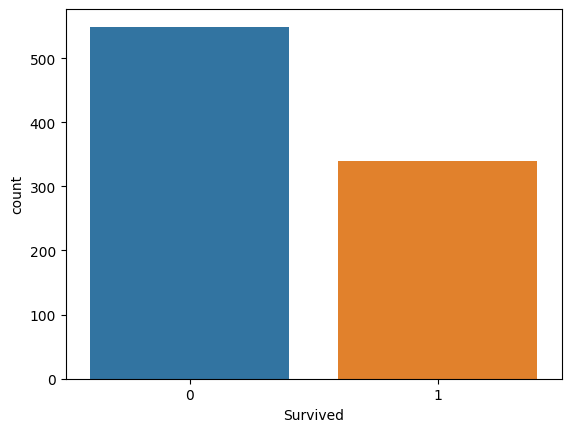

In [27]:
#Data visualization 
sns.countplot(x='Survived',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

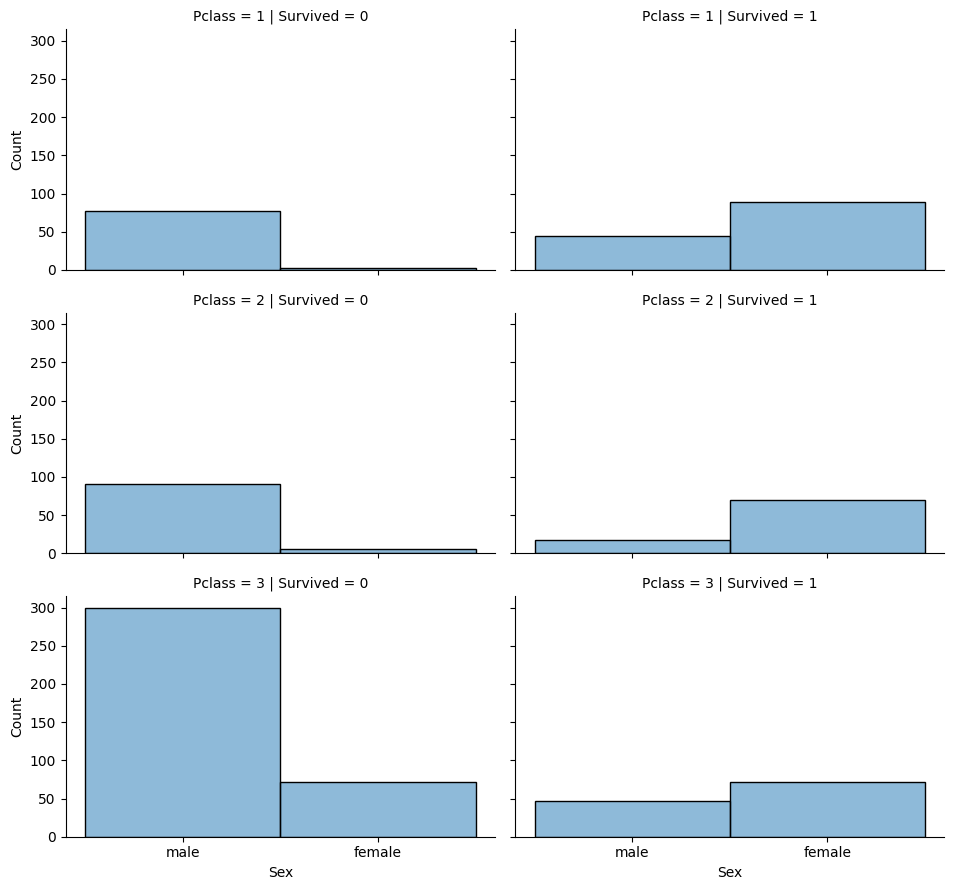

In [28]:
#plotting FacetGrid
grid = sns.FacetGrid(df, col='Survived', row='Pclass',aspect=1.6)
grid.map(sns.histplot, 'Sex', alpha=.5, bins=20)
grid.add_legend();

<Axes: xlabel='Sex', ylabel='count'>

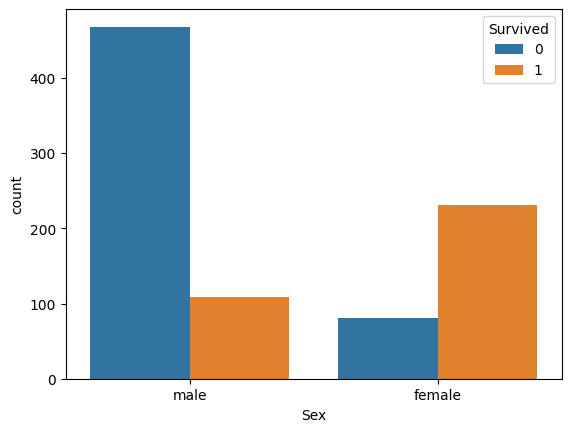

In [29]:
sns.countplot(x='Sex',hue='Survived',data=df)


The above chart illustrate that male are less likely to surive whereas the surival rate is higher for female

sns.countplot(x="Pclass",hue="Survived",data=df)

AS we can see people who have third class ticket are less likely to survive whereas the people who belonged to higher class has more favourable chance of surviving

In [30]:

df['Sex'] = df['Sex'].replace({'male':  0, 'female':  1})
df.head()

/tmp/ipykernel_18/2307317276.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male':  0, 'female':  1})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,0,3,0,22.0,1,0,7.2500,S,0
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [31]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})
df.head()

/tmp/ipykernel_18/1358648033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


According to my research not all the people had their own personal cabin. And from the above two chart we can see that the higher class especially class 1 passengers had cabin and on the basis of cabin the chance of surival depends. So people with out cabin will be filled with N== No cabin 

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,0
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


In [33]:
df.pivot_table(index='Survived',values=['Age','SibSp','Parch','Fare'])



,Age,Fare,Parch,SibSp
Survived,,,,
0,30.402116,22.117887,0.329690,0.553734
1,28.414879,48.209498,0.467647,0.476471


In [34]:
df.pivot_table(index='Survived',columns='Pclass',values='Fare',aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,134,87,119


<Axes: xlabel='Age'>

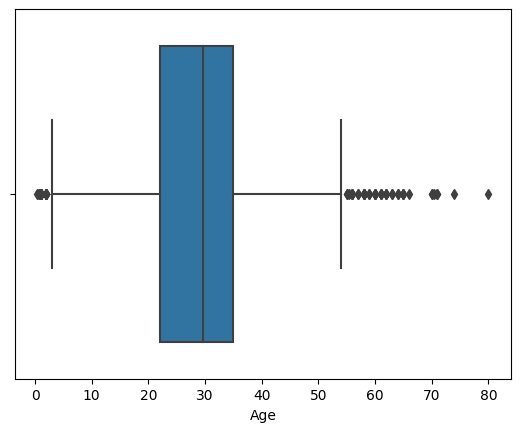

In [35]:
import seaborn as sns
sns.boxplot(x=df["Age"])


<Axes: xlabel='Fare'>

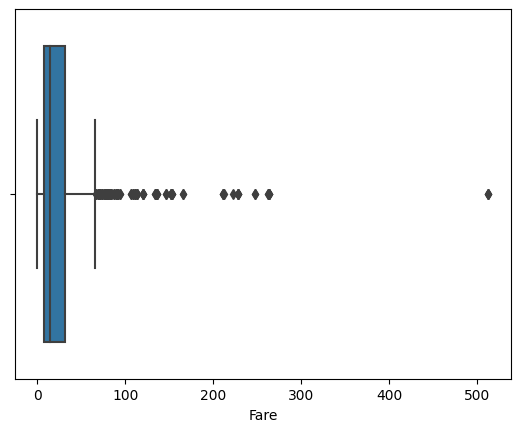

In [36]:
sns.boxplot(x=df["Fare"])

Data Normalization 

In [37]:
'''
def min_max_scaling(series):
    return (series-series.min())/(series.max()-series.min())
for col in df.columns:
    df['Age']=min_max_scaling(df['Age'])
    df['Pclass']=min_max_scaling(df['Pclass'])
    df['Fare']=min_max_scaling(df['Fare'])
    df['SibSp']=min_max_scaling(df['SibSp'])
'''

    

"\ndef min_max_scaling(series):\n    return (series-series.min())/(series.max()-series.min())\nfor col in df.columns:\n    df['Age']=min_max_scaling(df['Age'])\n    df['Pclass']=min_max_scaling(df['Pclass'])\n    df['Fare']=min_max_scaling(df['Fare'])\n    df['SibSp']=min_max_scaling(df['SibSp'])\n"

In [38]:
def z_score_standardization(series):
    return (series - series.mean()) / series.std()

for col in df.columns:
    df['Age']=z_score_standardization(df['Age'])
    df['Pclass']=z_score_standardization(df['Pclass'])
    df['Fare']=z_score_standardization(df['Fare'])
    df['SibSp']=z_score_standardization(df['SibSp'])

print(df.head())


   Survived    Pclass  Sex       Age     SibSp  Parch      Fare  Embarked  \
0         0  0.824744    0 -0.589288  0.431108      0 -0.499958         0   
1         1 -1.571327    1  0.644485  0.431108      0  0.788503         1   
2         1  0.824744    1 -0.280845 -0.474932      0 -0.486376         0   
3         1 -1.571327    1  0.413153  0.431108      0  0.422623         0   
4         0  0.824744    0  0.413153 -0.474932      0 -0.483861         0   

   CabinLetter  
0            0  
1            1  
2            0  
3            1  
4            0  


In [39]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,0,0.824744,0,-0.589288,0.431108,0,-0.499958,0,0
1,1,-1.571327,1,0.644485,0.431108,0,0.788503,1,1
2,1,0.824744,1,-0.280845,-0.474932,0,-0.486376,0,0
3,1,-1.571327,1,0.413153,0.431108,0,0.422623,0,1
4,0,0.824744,0,0.413153,-0.474932,0,-0.483861,0,0


Model training 

In [40]:
#splitting labeled and features into X and y
X=df.iloc[:,:-1]; y=df.iloc[:,-1]

In [41]:
X.shape

(889, 8)

In [42]:
y.shape

(889,)

In [43]:
df.isna().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinLetter    0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train.shape

(711, 8)

In [46]:
model_lr=LogisticRegression(max_iter=2000)

In [47]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [48]:
Y_predict=model_lr.predict(X_train)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_train,Y_predict)

0.8157524613220816

In [51]:
Y_test_predict=model_lr.predict(X_test)

In [52]:
accuracy_score(y_test,Y_test_predict)

0.7696629213483146

So there seems to be slight underfitting of the model. It may be beacuse of less data

Trying an SVM model

In [53]:
linear_SVM=LinearSVC()

In [54]:
linear_SVM.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [55]:
y_predict_svm=linear_SVM.predict(X_train)

In [56]:
accuracy_score(y_predict_svm,y_train)

0.8087201125175809

In [57]:
y_predict_svm_test=linear_SVM.predict(X_test)

In [58]:
accuracy_score(y_predict_svm_test,y_test)

0.7752808988764045

Using kernal trick with SVM to see if it can perform better


In [59]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')  # 'rbf' stands for Radial Basis Function, a common choice for the kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_train=clf.predict(X_train)


In [60]:
accuracy_score(y_pred,y_test)

0.7696629213483146

In [61]:
accuracy_score(y_pred_train,y_train)

0.8270042194092827

In [62]:
#using plynomial kernal for svm 
svm_poly=svm.SVC(kernel="poly")
svm_poly.fit(X_train,y_train)
Y_pred_svm_train=svm_poly.predict(X_train)
Y_pred_svm_test=svm_poly.predict(X_test)

In [63]:
print(f"The training accuracy is {accuracy_score(Y_pred_svm_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_svm_test,y_test)}")

The training accuracy is 0.8410689170182841
The test accuracy is 0.797752808988764


In [64]:
#using sigmoid kernal for svm 
svm_sigmoid=svm.SVC(kernel="sigmoid")
svm_sigmoid.fit(X_train,y_train)
Y_pred_sigmoid_train=svm_sigmoid.predict(X_train)
Y_pred_sigmoid_test=svm_sigmoid.predict(X_test)

In [65]:
print(f"The training accuracy is {accuracy_score(Y_pred_sigmoid_train,y_train)}")
print(f"The test accuracy is {accuracy_score(Y_pred_sigmoid_test,y_test)}")

The training accuracy is 0.770745428973277
The test accuracy is 0.7528089887640449


In [66]:
def accuracy_print(X,Y):
    print(f"The training accuracy score is : {X}")
    print(f"The test accuracy score is:{Y}")

From the above resuts we can conclude that linear svm and rbf kernal perform better

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [68]:
#Using Decision Tree
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(X_train,y_train)
y_dtc_predict_train=DTC.predict(X_train)
y_dtc_predict_test=DTC.predict(X_test)

In [69]:
accuracy_score_train=accuracy_score(y_train,y_dtc_predict_train)


In [70]:
accuracy_score_test=accuracy_score(y_test,y_dtc_predict_test)


In [71]:
accuracy_print(accuracy_score_train,accuracy_score_test)

The training accuracy score is : 1.0
The test accuracy score is:0.7584269662921348


we can see there is clearly overfitting of the model


Hyper parameters to solve the overfitting

In [72]:
#Using max_depth
DTC_md = DecisionTreeClassifier(max_depth=6, random_state=42)
DTC_md.fit(X_train,y_train)
y_dtc_md_train=DTC_md.predict(X_train)
y_dtc_md_test=DTC_md.predict(X_test)


In [73]:
accuracy_score(y_train,y_dtc_md_train)

0.8874824191279888

In [74]:
accuracy_score(y_test,y_dtc_md_test)

0.7696629213483146

In [75]:
#Using min_sample_split #pruning
DTC_pr = DecisionTreeClassifier(criterion="entropy",min_samples_split=35, random_state=42)
DTC_pr.fit(X_train,y_train)
y_dtc_pr_train=DTC_pr.predict(X_train)
y_dtc_pr_test=DTC_pr.predict(X_test)

In [76]:
accuracy_score(y_train,y_dtc_pr_train)

0.8466947960618847

In [77]:
accuracy_score(y_test,y_dtc_pr_test)

0.7808988764044944

In [78]:
#Using min_sample_split #pruning
DTC_leaf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=15, random_state=42)
DTC_leaf.fit(X_train,y_train)
y_dtc_lf_train=DTC_leaf.predict(X_train)
y_dtc_lf_test=DTC_leaf.predict(X_test)

In [79]:
accuracy_score(y_train,y_dtc_lf_train)

0.8312236286919831

In [80]:
accuracy_score(y_test,y_dtc_lf_test)

0.7752808988764045

In [81]:
import tensorflow as tf
from tensorflow.keras import layers 
from keras.optimizers import SGD
from keras.optimizers import Adagrad

2024-02-22 13:47:12.146346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 13:47:12.146488: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 13:47:12.343937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [82]:
opt=Adagrad()

In [83]:
ann = tf.keras.models.Sequential()

In [84]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1])) # Input layer

ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [85]:
ann.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [86]:
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
23/23 [==============================] - 1s 16ms/step - loss: 0.6957 - accuracy: 0.3390 - val_loss: 0.6959 - val_accuracy: 0.2921
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.3024 - val_loss: 0.6652 - val_accuracy: 0.2640
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.3038 - val_loss: 0.6370 - val_accuracy: 0.2640
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6401 - accuracy: 0.3066 - val_loss: 0.6105 - val_accuracy: 0.2416
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6247 - accuracy: 0.3010 - val_loss: 0.5875 - val_accuracy: 0.2416
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.3193 - val_loss: 0.5636 - val_accuracy: 0.2472
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.5973 - accuracy: 0.3052 - val_loss: 0.5421 - val_accuracy: 0.2472
Epoch 8/50
23/23 [=

In [87]:
loss, accuracy = ann.evaluate(X_test, y_test)
print('Test Accuracy: %.2f' % (accuracy*100))

# Make predictions
predictions = ann.predict(X_test)

# If you want to see the accuracy for each epoch, you can do this:
print("Accuracy for each epoch:")
print(history.history['accuracy'])

6/6 [==============================] - 0s 3ms/step - loss: -0.7448 - accuracy: 0.5225
Test Accuracy: 52.25
6/6 [==============================] - 0s 2ms/step
Accuracy for each epoch:
[0.3389592170715332, 0.302390992641449, 0.3037974536418915, 0.3066104054450989, 0.30098453164100647, 0.3192686438560486, 0.30520394444465637, 0.3108298182487488, 0.3586497902870178, 0.4205344617366791, 0.4360056221485138, 0.4514767825603485, 0.4542897343635559, 0.4571026861667633, 0.4627285599708557, 0.4599156081676483, 0.4641350209712982, 0.4669479727745056, 0.4641350209712982, 0.4669479727745056, 0.47116735577583313, 0.47538676857948303, 0.49085795879364014, 0.49507734179496765, 0.49789029359817505, 0.5007032155990601, 0.5035161972045898, 0.5063291192054749, 0.5119549632072449, 0.5175808668136597, 0.5274261832237244, 0.5316455960273743, 0.5358649492263794, 0.5358649492263794, 0.5386779308319092, 0.5386779308319092, 0.5386779308319092, 0.5400843620300293, 0.5443037748336792, 0.547116756439209, 0.547116756